In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv('dataset.csv')
df1 = pd.read_csv('symptom_Description.csv')
df2 = pd.read_csv('symptom_precaution.csv')
df3 = pd.read_csv('Symptom-severity.csv')

In [75]:
print("Structure dataset.csv\n")
df.info()
print("Shape of the dataset " + str(df.shape))
print('Number of duplicate instances: ' + str(df.duplicated().sum()))
print('Number of null features: \n' + str(df.isnull().sum()))
df.head()

Structura dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB
Shape of the dataset (4920, 

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
print("Structure symptom_Description.csv\n")
df1.info()
print("Shape of the dataset " + str(df1.shape))
print('Number of duplicate instances: ' + str(df1.duplicated().sum()))
print('Number of null features: \n' + str(df1.isnull().sum()))
df1.head()

Structura symptom_Description.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
Shape of the dataset (41, 2)
Number of duplicate instances: 0
Number of null features: 
Disease        0
Description    0
dtype: int64


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [77]:
print("Structure symptom_precaution.csv\n")
df2.info()
print("Shape of the dataset " + str(df2.shape))
print('Number of duplicate instances: ' + str(df2.duplicated().sum()))
print('Number of null features: \n' + str(df2.isnull().sum()))
df2.head()

Structura symptom_precaution.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB
Shape of the dataset (41, 5)
Number of duplicate instances: 0
Number of null features: 
Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [78]:
print("Structure Symptom_severity.csv\n")
df3.info()
print("Shape of the dataset " + str(df3.shape))
print('Number of duplicate instances: ' + str(df3.duplicated().sum()))
print('Number of null features: \n' + str(df3.isnull().sum()))
df3.head()

Structura Symptom_severity.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
Shape of the dataset (133, 2)
Number of duplicate instances: 0
Number of null features: 
Symptom    0
weight     0
dtype: int64


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [79]:
print(f"Number of unique diseases: {df['Disease'].nunique()}")
print(f"Number of unique symptoms: {pd.unique(df.iloc[:, 1:].values.ravel('K')).shape[0]}")

Number of unique diseases: 41
Number of unique symptoms: 132


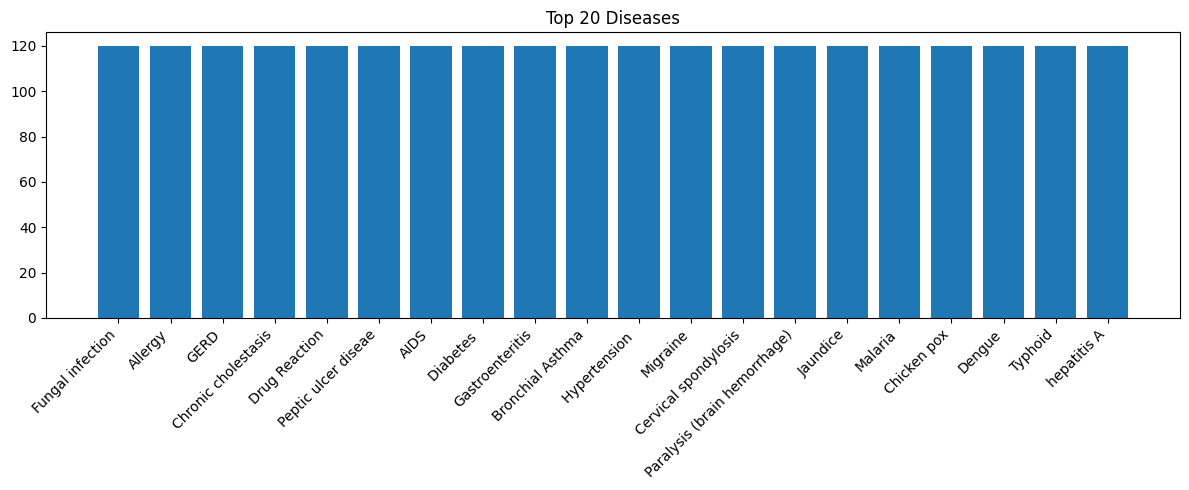

In [94]:

disease_counts = df["Disease"].value_counts().head(20)
plt.figure(figsize=(12,5))
plt.bar(disease_counts.index, disease_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Diseases")
plt.tight_layout()
plt.show()

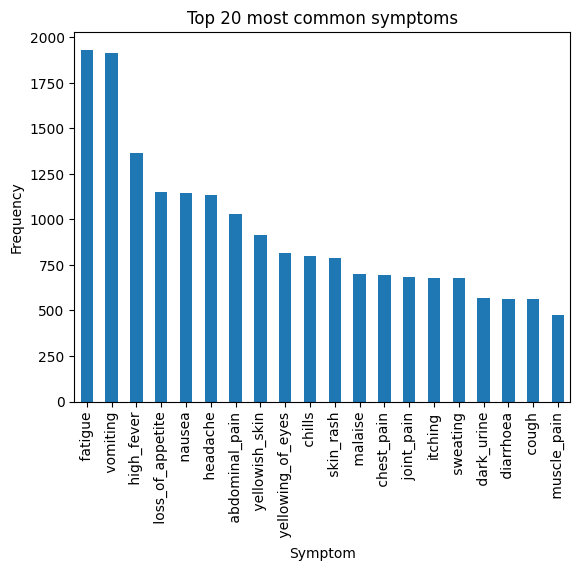

In [93]:
symptom_cols = [col for col in df.columns if col != "Disease"]
symptom_values = df[symptom_cols].astype(str).values.flatten()
symptom_values = [s for s in symptom_values if s.lower() not in ("", "nan", "none")]

symptom_freq = pd.Series(symptom_values).value_counts()

plt.figure()
symptom_freq.head(20).plot(kind='bar')
plt.title("Top 20 most common symptoms")
plt.xlabel("Symptom")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


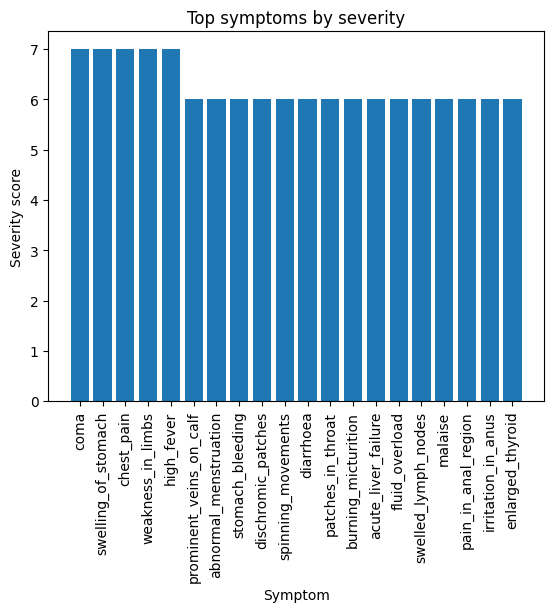

In [82]:
top_severity = df3.sort_values(by='weight', ascending=False).head(20)

plt.figure()
plt.bar(top_severity['Symptom'], top_severity['weight'])
plt.title("Top symptoms by severity")
plt.xlabel("Symptom")
plt.ylabel("Severity score")
plt.xticks(rotation=90)
plt.show()


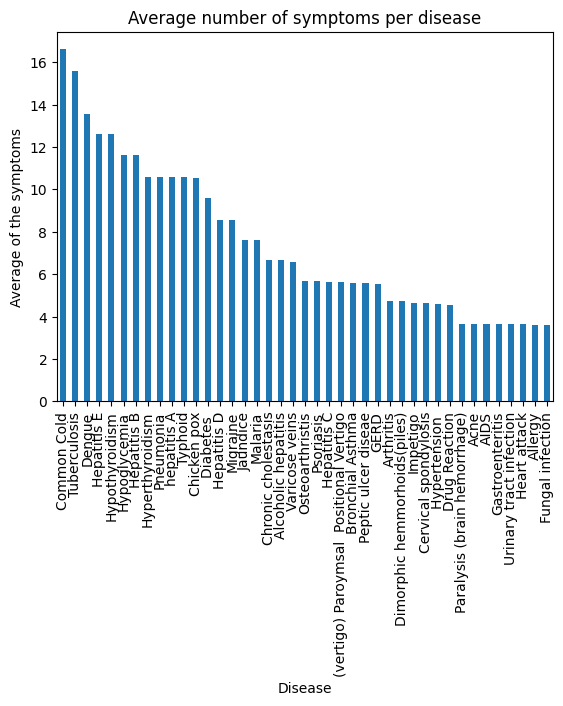

In [83]:
df['num_symptoms'] = df[symptom_cols].notna().sum(axis=1)

plt.figure()
df.groupby('Disease')['num_symptoms'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average number of symptoms per disease")
plt.xlabel("Disease")
plt.ylabel("Average of the symptoms")
plt.show()

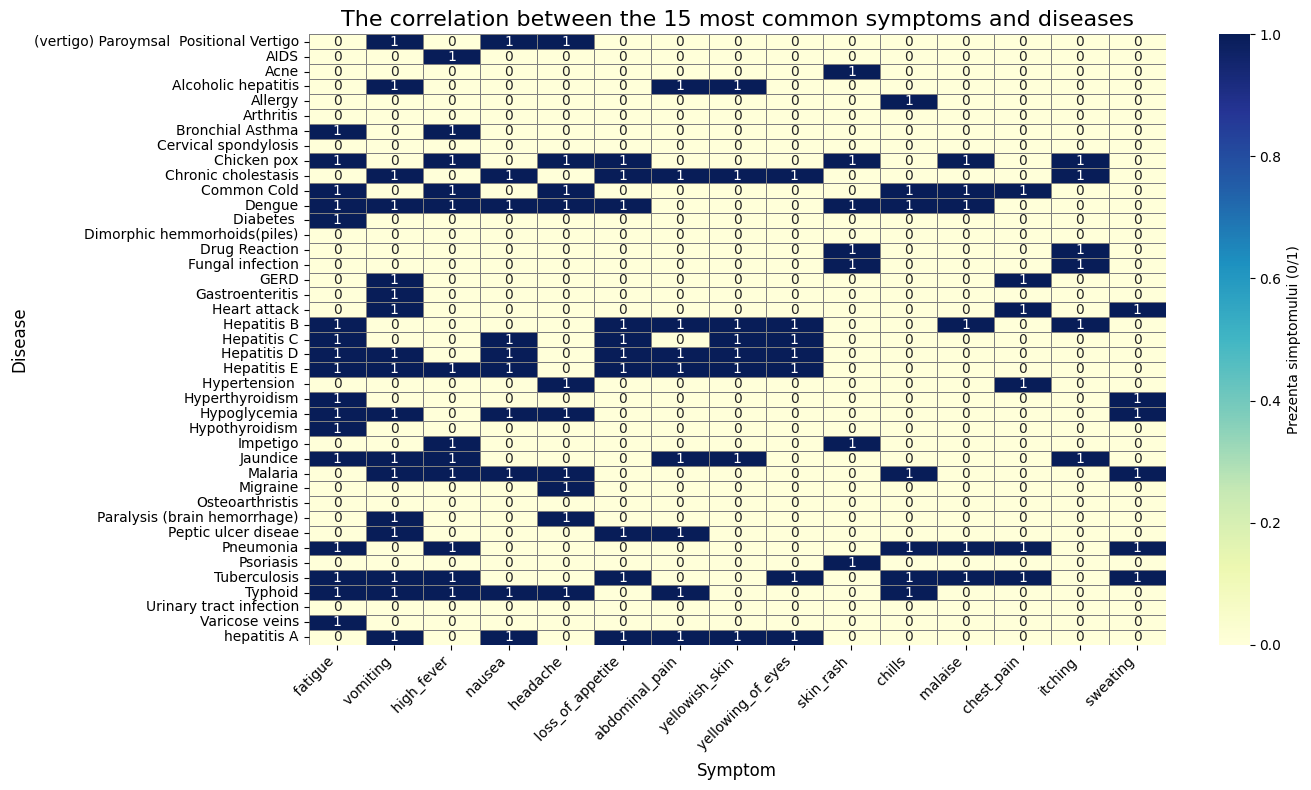

In [89]:
dataset_clean = dataset.fillna('')
symptom_cols = dataset_clean.columns[1:]

dataset_clean['Symptom_List'] = dataset_clean[symptom_cols].values.tolist()
dataset_clean['Symptom_List'] = dataset_clean['Symptom_List'].apply(lambda x: [s for s in x if s != ''])

mlb = MultiLabelBinarizer()
symptom_encoded = mlb.fit_transform(dataset_clean['Symptom_List'])

symptom_df = pd.DataFrame(symptom_encoded, columns=mlb.classes_)
symptom_df['Disease'] = dataset_clean['Disease']
disease_symptom_matrix = symptom_df.groupby('Disease').max()

symptom_frequency = disease_symptom_matrix.sum().sort_values(ascending=False)
top_symptoms = symptom_frequency.index[:15]

plt.figure(figsize=(14,8))
sns.heatmap(
    disease_symptom_matrix[top_symptoms],
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    cbar_kws={'label': 'Presence of the symptom (0/1)'}
)
plt.title("The correlation between the 15 most common symptoms and diseases" , fontsize=16)
plt.xlabel("Symptom", fontsize=12)
plt.ylabel("Disease", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
